Этапы проекта:
1. Изучение и подготовка данных:

In [37]:
# Импортирую нужные библиотеки для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Чтение CSV файла
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Массив данных состоит из 21613 записей без пропусков в данных и содержит только 1 текстовое поле "date".

In [39]:
#Удаляю лишние столбцы, так как они не несут полезной информации для модели

df=df.drop(columns=['id','zipcode','lat','long'])


В датасете формат даты представлен как YYYYMMDDT000000. Можно было бы удалить этот столбец из датасета. Однако здесь есть другие признаки, такие как год постройки (yr_built) и год последнего ремонта (yr_renovated), которые записаны просто в формате года (YYYY), что не всегда является информативным.

Путем использования информации о дате публикации можно преобразовать год постройки и год ремонта в возраст объекта, вычитая год постройки или год ремонта из года публикации. Следует отметить, что для некоторых домов год последнего ремонта указан как 0, что, вероятно, означает отсутствие ремонта с момента постройки.

Прежде чем заменить нули в годе ремонта на год постройки, нужно проверить данные на наличие ошибок, таких как случаи, когда год ремонта предшествует году постройки.

In [40]:
df[(df['yr_renovated']<df['yr_built'])&df['yr_renovated']!=0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15


In [41]:
df.loc[df['yr_renovated']==0, ['yr_renovated']]=df['yr_built']
df['yr_built']=df['date'].str[0:4].astype(int)-df['yr_built']
df['yr_renovated']=df['date'].str[0:4].astype(int)-df['yr_renovated']
df=df.drop('date', axis=1)
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,59,59,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,63,23,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,82,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,49,49,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,28,1800,7503


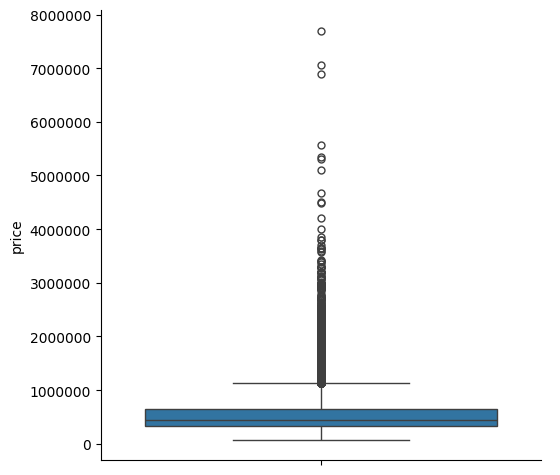

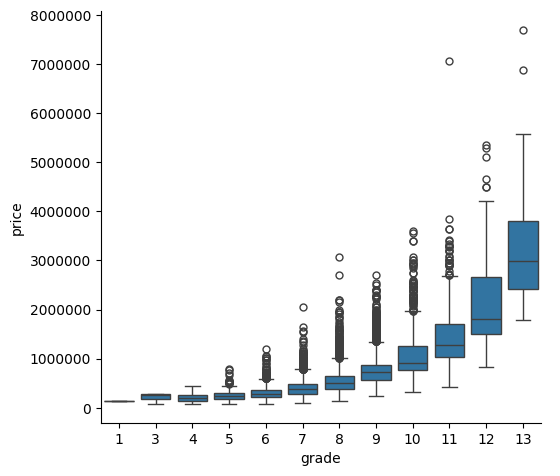

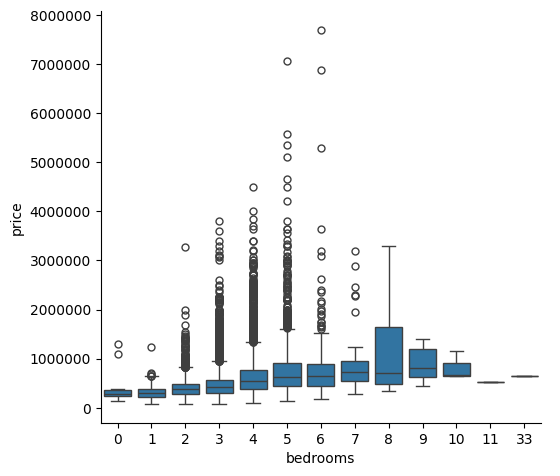

In [42]:
#Строение boxplot для анализа цен по разным параметрам
g1 = sns.catplot(y='price', kind='box', data=df) #price
g2 = sns.catplot(y='price', x='grade', kind='box', data=df) #price&grade
g3 = sns.catplot(y='price', x='bedrooms', kind='box', data=df) #price & bedrooms

# Изменение формата оси y для всех графиков
for ax in [g1.ax, g2.ax, g3.ax]:
    ax.yaxis.get_major_formatter().set_scientific(False)

plt.show()



С графика сразу видно, что имеются аномальные значения для цены и количества спален (на линии bedrooms имеется дом с 33 спальнями). Эти аномалии, или выбросы, могут вызвать переобучение модели, поскольку алгоритмы стремятся минимизировать ошибку, связанную с ними. На графике видно, что большинство данных (93,22%) находятся в диапазоне от 0 до 1 миллиона, а лишь 198 значений (0,92%) превышают отметку в 2 миллиона. Удаление 1% датасета можно выполнить практически безболезненно. Просто отсортировав записи по цене и проанализировав 217 значений, можно найти цену в 1 965 000 и удалить все записи с более высокими значениями.


In [43]:
df.sort_values (by='price', ascending=False).head(217) 
df=df[df['price']<=1965000]

Если тщательно проверить столбец bedrooms, можно заметить, что есть 13 домов с числом спален равным 0, а также странная запись о доме с 33 спальнями. Можно поступить аналогично с признаком price, удалив нулевые значения из bedrooms (и, кстати, из bathrooms тоже)

In [44]:
df=df[(df['bedrooms']!=0)&(df['bathrooms']!=0)]


Предполагая, что цена указана неверно, и что фактическое количество спален в доме с 33 спальнями составляет 3, можно сравнить его жилую площадь (1620) со средней жилой площадью домов с 3 спальнями (1798,2). Это подтверждает наше предположение, поэтому я просто исправляю это значение на 3 и снова построю предыдущую box plot по bedrooms
.


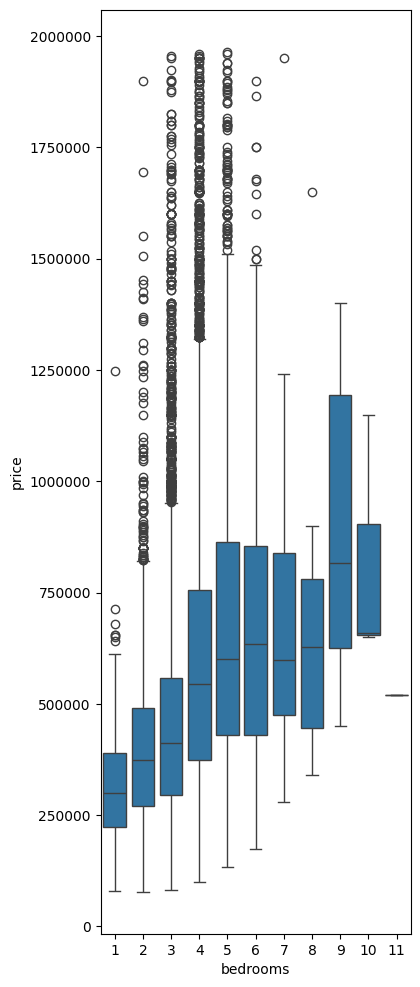

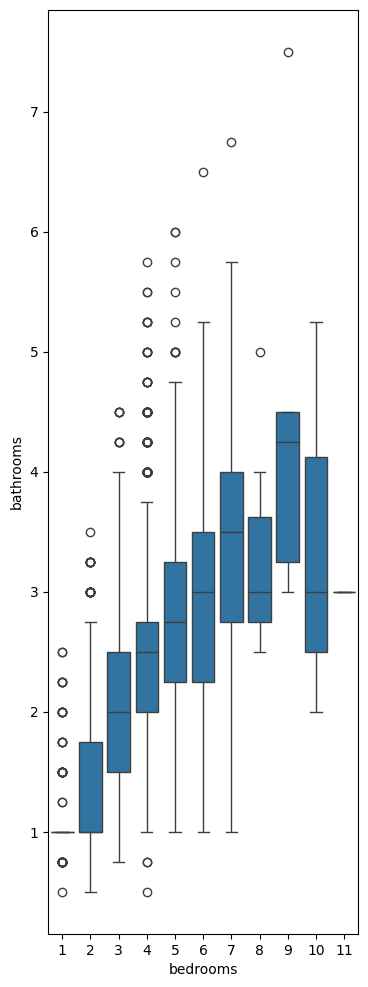

In [45]:
df.loc[df['bedrooms']==33,['bedrooms']]=3 

# Создание графика boxplot по bedrooms
b1 = sns.boxplot(y='price', x='bedrooms', data=df)
b1.yaxis.get_major_formatter().set_scientific(False)  # Изменение формата оси y

# Отображение первого графика
plt.show()

# Создание графика boxplot по bathrooms
b2 = sns.boxplot(y='bathrooms', x='bedrooms', data=df)
b2.yaxis.get_major_formatter().set_scientific(False)  # Изменение формата оси y

# Отображение второго графика
plt.show()

В полях sqft_living, floors, waterfront, view, condition, grade, sqft_living15 также все значения более-менее реальны, их трогать не буду:

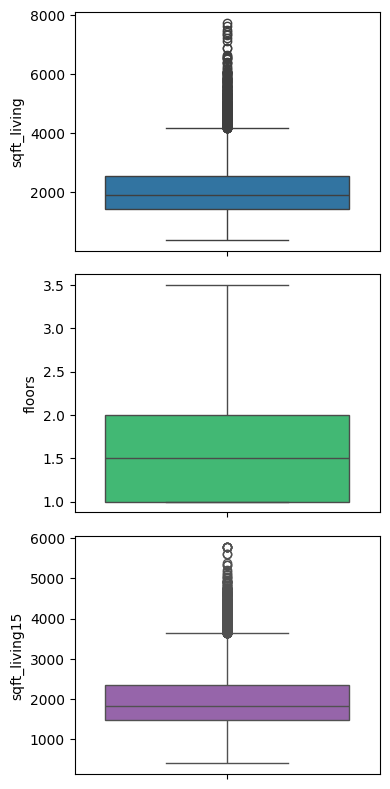

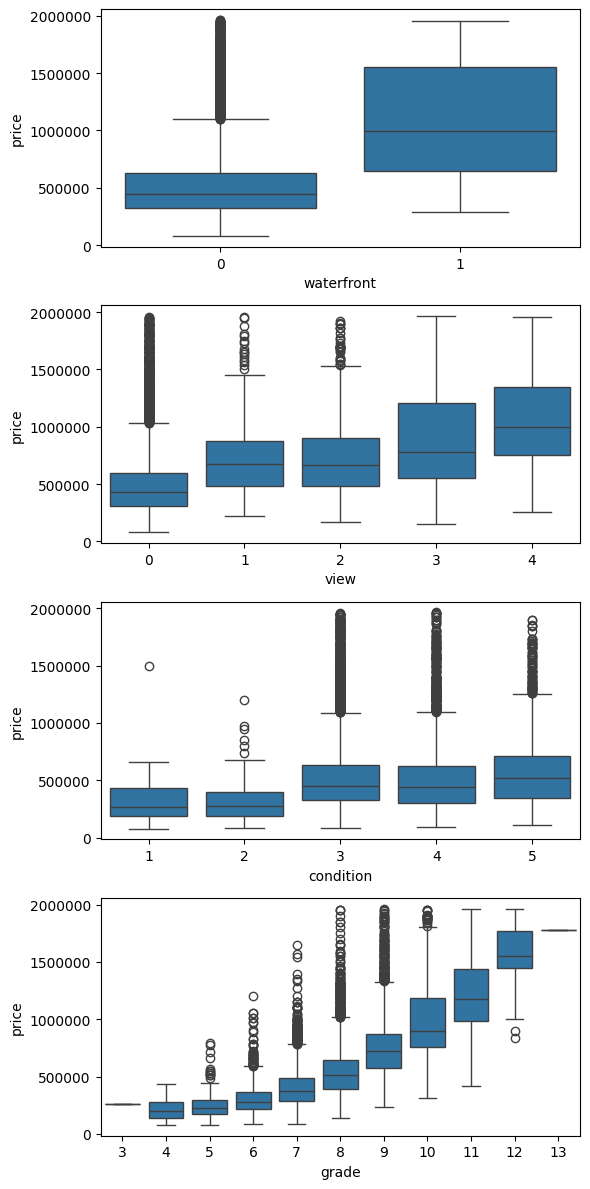

In [46]:
# Изменение размера картинки для первых трех графиков
plt.rcParams['figure.figsize'] = (4, 8)

# Создание графиков boxplot для первых трех признаков
fig, axes = plt.subplots(nrows=3, ncols=1)
sns.boxplot(y='sqft_living', data=df, ax=axes[0])
axes[0].yaxis.get_major_formatter().set_scientific(False)

sns.boxplot(y='floors', color='#2ecc71', data=df, ax=axes[1])
axes[1].yaxis.get_major_formatter().set_scientific(False)

sns.boxplot(y='sqft_living15', color='#9b59b6', data=df, ax=axes[2])
axes[2].yaxis.get_major_formatter().set_scientific(False)

# Отображение первых трех графиков
plt.tight_layout()  # Для автоматической коррекции полей между графиками
plt.show()

# Изменение размера картинки для оставшихся графиков
plt.rcParams['figure.figsize'] = (6, 12)

# Создание графиков boxplot для оставшихся признаков
fig, axes = plt.subplots(nrows=4, ncols=1)
sns.boxplot(y='price', x='waterfront', data=df, ax=axes[0])
axes[0].yaxis.get_major_formatter().set_scientific(False)

sns.boxplot(y='price', x='view', data=df, ax=axes[1])
axes[1].yaxis.get_major_formatter().set_scientific(False)

sns.boxplot(y='price', x='condition', data=df, ax=axes[2])
axes[2].yaxis.get_major_formatter().set_scientific(False)

sns.boxplot(y='price', x='grade', data=df, ax=axes[3])
axes[3].yaxis.get_major_formatter().set_scientific(False)

# Отображение оставшихся графиков
plt.tight_layout()  # Для автоматической коррекции полей между графиками
plt.show()

Как мы видим, значения в признаках sqft_lot и sqft_lot15 слишком велики, поэтому здесь логарифмирование может помочь улучшить визуализацию на графиках boxplot. Вот как можно это сделать:

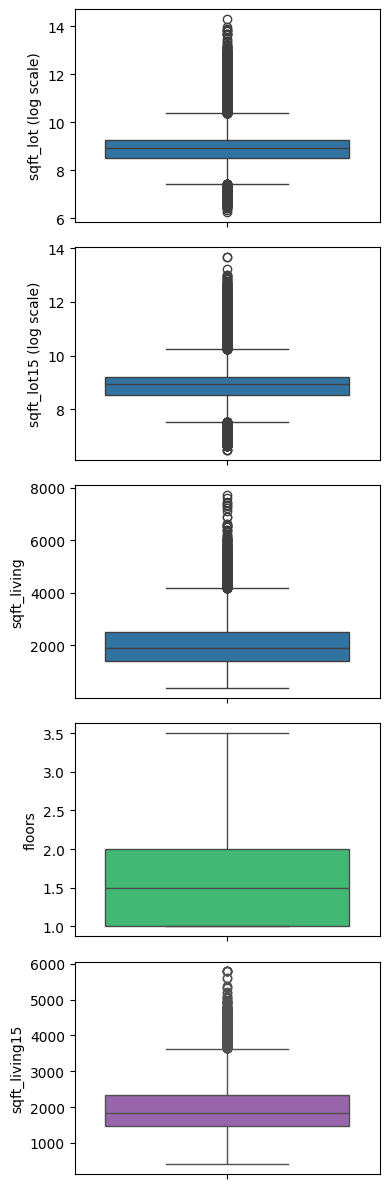

In [47]:
import numpy as np
# Логарифмирование признаков sqft_lot и sqft_lot15
df['sqft_lot_log'] = np.log1p(df['sqft_lot'])
df['sqft_lot15_log'] = np.log1p(df['sqft_lot15'])

# Изменение размера картинки для первых пяти графиков
plt.rcParams['figure.figsize'] = (4, 12)

# Создание графиков boxplot для первых пяти признаков
fig, axes = plt.subplots(nrows=5, ncols=1)
sns.boxplot(y='sqft_lot_log', data=df, ax=axes[0])
axes[0].set_ylabel('sqft_lot (log scale)')

sns.boxplot(y='sqft_lot15_log', data=df, ax=axes[1])
axes[1].set_ylabel('sqft_lot15 (log scale)')

sns.boxplot(y='sqft_living', data=df, ax=axes[2])
sns.boxplot(y='floors', color='#2ecc71', data=df, ax=axes[3])
sns.boxplot(y='sqft_living15', color='#9b59b6', data=df, ax=axes[4])

# Отображение графиков
plt.tight_layout()
plt.show()

На этом предварительный анализ закончился. Теперь посмотрим на тепловую карту корреляций:

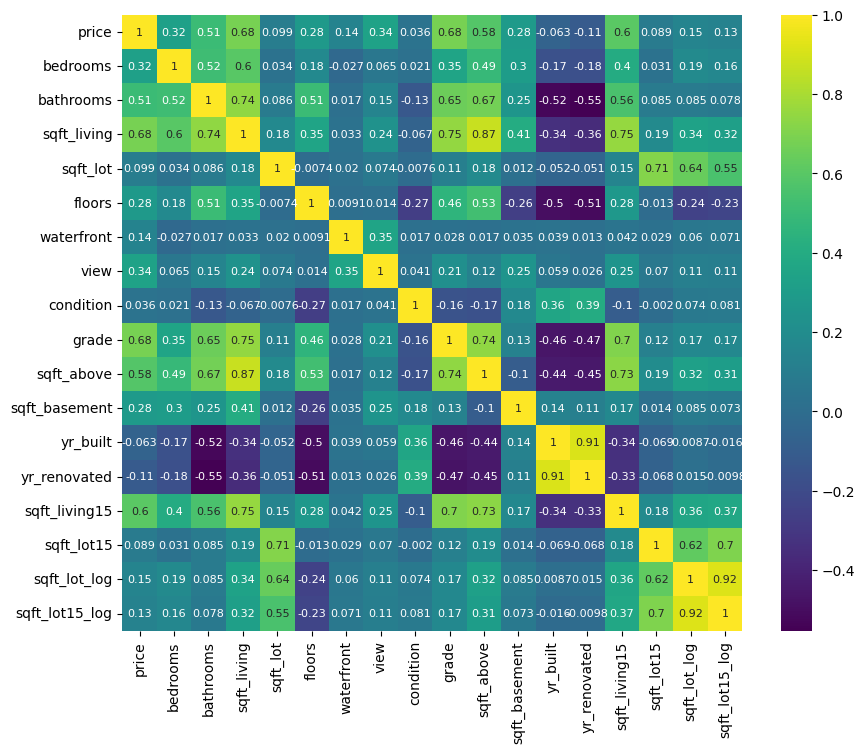

In [48]:
# Отображение карты корреляций с указанием параметра numeric_only до удаления столбцов с высокой корреляцией

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='viridis', annot=True, annot_kws={"size": 8})
plt.show()

Изучив карту корреляций видим, что иногда признаки сильно коррелированы между собой, поэтому удалим часть признаков с высокой корреляцией – sqft_lot15 (оставим sqft_lot), yr_built (оставим yr_renovated), sqft_above (sqft_living).

In [49]:
# Удаление признаков с высокой корреляцией
data = df.drop(columns=['sqft_lot15', 'yr_built', 'sqft_above'])


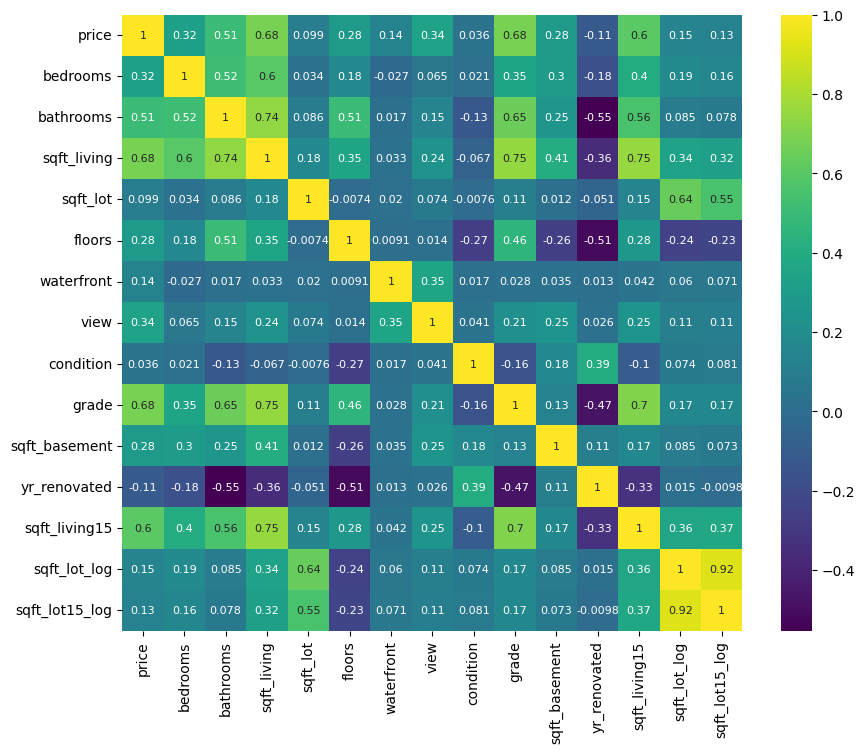

In [50]:
# Отображение карты корреляций с указанием параметра numeric_only после удаления столбцов с высокой корреляцией
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), cmap='viridis', annot=True, annot_kws={"size": 8})
plt.show()

2. Обучение модели:

В данной части я построю 2 модели: линейную регрессию и дерево решений.

Все необходимые нам модели содержаться в библиотеке sklearn.

Для начала отделяю целевую переменную от остальных данных для обучения, а также разделяю выборки на обучающую (70%) и тестовую (30%, на которой мы проверим как работает модель):

In [51]:
from sklearn.model_selection import train_test_split


# Отделяем целевую переменную от остальных данных
X = data.drop(columns=['price'])
y = data['price']

# Разделяем данные на обучающий и тестовый наборы (70% обучающий, 30% тестовый)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Выводим размеры полученных наборов
print("Размер обучающего набора:", X_train.shape, y_train.shape)
print("Размер тестового набора:", X_test.shape, y_test.shape)


Размер обучающего набора: (14966, 14) (14966,)
Размер тестового набора: (6415, 14) (6415,)


Также из sklearn для оценки модели загрузим 3 метрики — mean_absolute_error (средняя абсолютная ошибка), mean_squared_error (Среднеквадратическое отклонение), r2_score (коэффициент детерминации):

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Начну с линейной регрессии:

In [53]:
from sklearn.linear_model import LinearRegression

#Создаем модель
LR = LinearRegression() 

#Обучаем модель
LR.fit(X_train, y_train)

#Предсказываем значения для выборки   
y_LR = LR.predict(X_test) 

#Метрики
print ('MAE:', round (mean_absolute_error(y_test, y_LR),3))
print ('√MSE:', round (mean_squared_error(y_test, y_LR)**(1/2),3))
print ('R2_score:', round (r2_score(y_test, y_LR),3))

MAE: 123171.93
√MSE: 171899.351
R2_score: 0.626


Дерево решений:

In [54]:
from sklearn.tree import DecisionTreeRegressor

#Создаем модель
TR = DecisionTreeRegressor()

#Обучаем модель
TR.fit(X_train, y_train)

#Предсказываем значения для выборк
y_TR=TR.predict(X_test) 

#Метрики
print ('MAE:', round (mean_absolute_error(y_test, y_TR),3))
print ('√MSE:', round (mean_squared_error(y_test, y_TR)**(1/2),3))
print ('R2_score:', round (r2_score(y_test, y_TR),3))

MAE: 148560.015
√MSE: 214080.356
R2_score: 0.419


3. Оценка моделей:

Давайте сравнить две модели, линейную регрессию и дерево решений, используя метрики оценки производительности, такие как MAE (средняя абсолютная ошибка), √MSE (квадратный корень из среднеквадратической ошибки) и R2_score (коэффициент детерминации). Затем мы можем сделать выводы о том, какая модель лучше подходит для наших данных.

Для сравнения моделей, я сначала проанализирую результаты:

Линейная регрессия:

* MAE: 123171.93
* √MSE: 171899.351
* R2_score: 0.626

Дерево решений:

* MAE: 148560.015
* √MSE: 214080.356
* R2_score: 0.419

Теперь давайте проанализируем результаты:

MAE (Mean Absolute Error) показывает среднее абсолютное отклонение предсказанных значений от фактических. Меньшее значение MAE указывает на более точные прогнозы. В данном случае, у линейной регрессии MAE значительно меньше, что говорит о том, что она предсказывает значения более точно.

√MSE (Square Root of Mean Squared Error) - корень из среднеквадратической ошибки. Она также показывает, насколько точно модель предсказывает значения. Опять же, меньшее значение √MSE указывает на более точные прогнозы. И здесь у линейной регрессии значение меньше, чем у дерева решений.

R2_score (Coefficient of Determination) показывает, насколько хорошо модель объясняет вариацию зависимой переменной. Значение близкое к 1 указывает на хорошую модель. У линейной регрессии значение R2_score ближе к 1, что указывает на лучшее качество предсказаний.

Исходя из этих результатов, можно сделать вывод, что линейная регрессия является лучшей моделью для данного набора данных. Она обеспечивает более точные прогнозы и лучше объясняет вариацию в данных.

4. Мини отчет: 


В этом проекте я сначала подробно рассмотрел данные, проведя предварительный анализ и обработку, что включало в себя удаление лишних столбцов, преобразование данных и удаление выбросов. Затем использовал библиотеки pandas, matplotlib и seaborn для визуализации данных и анализа корреляции между признаками.

После этого я перешел к моделированию, где рассмотрел две модели: линейную регрессию и дерево решений. Для этого я разделил данные на обучающий и тестовый наборы, обучил модели и оценил их производительность с помощью нескольких метрик, таких как средняя абсолютная ошибка (MAE), квадратный корень из среднеквадратической ошибки (√MSE) и коэффициент детерминации (R2_score).

По результатам оценки моделей, линейная регрессия показала лучшие показатели производительности по всем метрикам, поэтому я выбрал ее в качестве лучшей модели для наших данных.

В итоге, мой проект включал в себя анализ данных, обработку их, построение моделей машинного обучения и оценку их производительности, что помогло мне сделать выводы о наиболее подходящей модели для решения нашей задачи.